<font size=6> Data Analytics Project - New York Taxicab Fare Prediction <font>
    
### Data Analytics Project Report - Fall 2022
### Habtegiorgis Mengistie    

### Table of Content

1.	Executive Summary
2.	Problem Scoping
3.	Dataset Attributes Information
4.	Data Preprocessing
5.	Feature Engineering
6.	Data Exploration/Data Analysis
7.	Modeling
8.	Model Evaluation
9.	Conclusion
10.	References

## Executive Summary

### Task :

To perform descriptive and inferential analysis of the dataset followed by leveraging machine learning for predicting the fare prices of in-demand ride-hailing services.

### Dataset Background :
The dataset is taken from the TCL New York City Taxi data collection during the time period of 2016 Feb [1]. The fields include pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts. In addition, there are fields describing the extra charges applied to the fares. The data used in the attached datasets were collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers authorized under the Taxicab & Livery Passenger Enhancement Programs (TPEP/LPEP). These features are intuitively important to estimate the total fare amount.

### Approach/methods:

As the target variable “`fare amount`” consists of real numbers, this becomes a regression task. Before training the ML models, we need to add new features to the dataset which would help the ML models to predict the fare amount. After performing feature engineering and data exploration we are going to perform modelling by choosing three models. The selection of the model is done by their time and space complexity. We choose `Linear Regression` as `baseline` model and then train more complex models like Decision Trees and `XGBoost`.

### Results:

### Dataset Attributes Information

**Description:** The aim is to predict the fare amount (inclusive of tolls) for a taxi ride in New York City given the pickup and dropoff locations. The Data set is taken from the TCL New York City Taxi data collection in particular we are looking at the time period of 2016 Feb.

| **Field Name**        | **Description**                                                                                                                                                                            |
| --------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ |
| VendorID              | A code indicating the TPEP provider that provided the record.     1= Creative Mobile Technologies, LLC; 2= VeriFone      Inc.                                                                                                                     |
| tpep_pickup_datetime  | The date and time when the meter was engaged.                                                                                                                                              |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.                                                                                                                                           |
| passenger_count       | The number of passengers in the vehicle.This is a driver-entered value.                                                                                                                    |
| trip_distance         | The elapsed trip distance in miles reported by the taximeter.                                                                                                                              |
| pickup_longitude      | Longitude where the meter was disengaged.                                                                                                                                                  |
| pickup_latitude       | Latitude where the meter was disengaged.                                                                                                                                                   |
| RateCodeID            | The final rate code in effect at the end of the trip. **1= Standard rate, 2=JFK, 3=Newark, 4=Nassau or Westchester, 5=Negotiated fare, 6=Group ride**                                                                                                                                      |
| store_and_fwd_flag    | This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server. **Y= store and forward, N= not a store and forward** |
| payment_type          | A numeric code signifying how the passenger paid for the trip. **1= Credit card, 2= Cash, 3= No charge, 4= Dispute, 5= Unknown, 6= Voided trip**
| fare_amount           | The time-and-distance fare calculated by the meter.                                                                                                                                        |
| extra                 | Miscellaneous extras and surcharges. Currently, this only includes the $0.50 and $1 rush hour and overnight charges.                                                                       |
| mta_tax               | $0.50 MTA tax that is automatically triggered based on the metered rate in use.                                                                                                            |
| improvement_surcharge | $0.30 improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015.                                                                         |
| tip_amount            | Tip amount – This field is automatically populated for credit card tips. Cash tips are not included.                                                                                       |
| tolls_amount          | Total amount of all tolls paid in trip.                                                                                                                                                    |
| total_amount          | The total amount charged to passengers. Does not include cash tips.                                                                                                                        |
| GoodTip               | Categorical variable indicating an above average tip                                                                                                                                       |
| Extra                 | An indicator for additional charges included.                                                                                                                                              |
| Cash                  | An indicator whether payment was made by cash or not                                                                                                                                       |


# Detailed Report <a id ="detailed-report"></a>

<font size=4> Importing Necessary Libraries <font>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import math
from math import sqrt

from numpy import absolute
from numpy import mean
from numpy import std

from sklearn import metrics
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold
from sklearn import neighbors

import xgboost as xgb

## Data Preprocessing

#### Step 1: Loading the dataset
- We load the dataset using the `read_csv` method from Pandas class/library
- We have also, used the parse attribute of `read_csv` method to handle the pickup/drop off date and time
- We can immediately observe that there are few variables which are non-int/float type. We have to handle them before training our ML model.

In [ ]:
#pickup_datetime was represented as an object so I converted it to a time variable
train = pd.read_csv('exam_data.csv', parse_dates=["tpep_pickup_datetime","tpep_dropoff_datetime"])
train.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,GoodTip,Extra,Cash
0,1,1,2016-02-01 00:00:27,2016-02-01 00:15:36,1,4.50,-73.983902,40.755043,1,N,...,15.5,0.5,0.5,0.0,0.00,0.3,16.80,False,True,True
1,2,2,2016-02-07 16:20:37,2016-02-07 16:28:13,1,1.59,-73.978447,40.719990,1,N,...,8.0,0.0,0.5,0.0,0.00,0.3,8.80,False,False,True
2,3,1,2016-02-07 16:20:44,2016-02-07 16:26:02,2,1.20,-73.993805,40.741699,1,N,...,6.5,0.0,0.5,1.0,0.00,0.3,8.30,False,False,False
3,4,1,2016-02-19 20:51:56,2016-02-19 21:20:14,1,17.10,-73.790024,40.644024,2,Y,...,52.0,0.0,0.5,0.0,5.54,0.3,58.34,False,False,False
4,5,2,2016-02-19 20:53:06,2016-02-19 20:55:30,5,0.56,-74.001534,40.736050,1,N,...,4.0,0.5,0.5,0.0,0.00,0.3,5.30,False,True,True


In [ ]:
print(train.shape)

(28454, 23)


The dataset contains **28454** trip records and **22** columns. The data is is from February 2016. VendorID and RatecodeID are categorical variables which are already integer (label) encoded. The features store_and_fwd_flag, GoodTip, Extra, and Cash are boolean.
There are also datetime features (pickup and dropoff). The remaining features are numerical.

#### Step 2. Basic information about data

The df.info() function will give us the basic information about the dataset. For any data, it is good to start by knowing its information. Let’s see how it works with our data.

In [ ]:
#Basic information
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28454 entries, 0 to 28453
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             28454 non-null  int64         
 1   VendorID               28454 non-null  int64         
 2   tpep_pickup_datetime   28454 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  28454 non-null  datetime64[ns]
 4   passenger_count        28454 non-null  int64         
 5   trip_distance          28454 non-null  float64       
 6   pickup_longitude       28454 non-null  float64       
 7   pickup_latitude        28454 non-null  float64       
 8   RatecodeID             28454 non-null  int64         
 9   store_and_fwd_flag     28454 non-null  object        
 10  dropoff_longitude      28454 non-null  float64       
 11  dropoff_latitude       28454 non-null  float64       
 12  payment_type           28454 non-null  int64         
 13  f

#### Step 3: Descriptive Statistical Analysis

In [ ]:
train.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000
mean,14227.500000,1.535812,1.662192,2.829166,-72.835694,40.123947,1.038659,-72.905681,40.163218,1.330639,12.332492,0.327177,0.497751,1.755957,0.268944,0.299810,15.482131
std,8214.106616,0.498725,1.320486,3.481767,9.107313,5.017094,0.644518,8.826368,4.862445,0.485452,10.523090,0.429670,0.035001,2.298462,1.301421,0.009739,12.865315
min,1.000000,1.000000,0.000000,0.000000,-77.059593,0.000000,1.000000,-77.059593,0.000000,1.000000,-5.500000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-6.300000
25%,7114.250000,1.000000,1.000000,1.000000,-73.991653,40.736421,1.000000,-73.991247,40.734498,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.300000
50%,14227.500000,2.000000,1.000000,1.650000,-73.981510,40.753141,1.000000,-73.979820,40.753441,1.000000,9.000000,0.000000,0.500000,1.350000,0.000000,0.300000,11.750000
75%,21340.750000,2.000000,2.000000,3.020000,-73.966789,40.767938,1.000000,-73.962784,40.769032,2.000000,14.000000,0.500000,0.500000,2.350000,0.000000,0.300000,17.160000
max,28454.000000,2.000000,6.000000,56.100000,0.000000,41.988914,99.000000,0.000000,41.988914,4.000000,310.000000,5.000000,0.500000,50.000000,25.000000,0.300000,310.800000


<font size=4> Observations <font>
- We can observe that the minimum fare is negative **(-5.50)**. This is clearly an anomaly, as in real world this is not possible.
- The maximum drop off longitude is  **0.00** which is not possible for New York City. Hence, we might expect similar outliers like this, which needs to be removed.  
- The minimum passenger count is **0**, which again is erroneous.


https://www.latlong.net/place/new-york-city-hall-ny-usa-5431.html

#### Step 4. Duplicate values
 You can use the df.duplicate.sum() function to the sum of duplicate value present if any. It will show the number of duplicate values if they are present in the data.

In [ ]:
train.duplicated().sum()

0

#### Step 5: Handling Null Values
Finding the null values is the most important step in the EDA. As I told many a time, ensuring the quality of data is paramount. So, let’s see how we can find the null values.

In [ ]:
train.isnull().sum()

Unnamed: 0               0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
pickup_longitude         0
pickup_latitude          0
RatecodeID               0
store_and_fwd_flag       0
dropoff_longitude        0
dropoff_latitude         0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
GoodTip                  0
Extra                    0
Cash                     0
dtype: int64

- We can observe that there aren’t any Null values present for any of the features, hence we don’t have to worry about data imputation.

Now that we have better understanding of our dataset, we can proceed with further analysis.

# Feature Engineering
We are going to address the issues discovered during the descriptive statistical analysis, by changing the features.

### Step 1: Setting limits for feature – Fare Amount
As there cannot be negative values in the `fare_amount` feature, we are going to only keep the datapoints which correspond to the range of fare amount.

As the New York Taxi cab association in **2016** had a base fare of 2.50\\$ according to  according to their rate card, we are going to set the lower limit of the fare as 2.50\\$ and we are going to assume that any fare which is more than 200\\$  is an outlier, as it’s our maximum value of the fare.

In [ ]:
train = train.dropna(how = 'any', axis = 'rows')

In [ ]:
print('Old size: %d' % len(train))

Old size: 28454


In [ ]:
# drop rows with negtaive fare values .
train = train.drop(train[train.fare_amount<2.5].index, axis = 0)
train = train.drop(train[train.fare_amount>300].index, axis = 0)

### Step 2: Setting limits for feature – Passenger Count
- As, the minimum passenger count cannot be `zero`, we are going to drop all those datapoints where passenger count is zero.
- We are going to set a limit to passenger count as well, because there is a maximum limit to ride sharing. Hence, according to the minimum and maximum values of our dataset, we have set the minimum limit as **1** and maximum limit as **6**. All the datapoints which do not lie in this range are going to be dropped

Delete the data whose passenger_count exceeded 6, because it cannot physically fit more in the taxi and it is not allowed. Taxi can also move without passenger and carry cargo, so lets permit passenger_count == 0 data


In [ ]:
train = train.drop(train[train['passenger_count']>6].index, axis = 0)
train = train.drop(train[train['passenger_count']<0].index, axis = 0)

### Step 3: Setting limits for feature – Pickup and Drop off location
- As the longitude as only exits between `180` to `-180` degrees, we are going to drop all the datapoints which correspond to longitude values outside this range.

-  As the latitude as only exits between `90` to `-90` degrees, we are going to drop all the datapoints which correspond to latitude values outside this range.

 Remove the pickup_longitude data whose values are greater than 180 and less than -180

In [ ]:
train = train.drop(train[train['pickup_longitude']<-180].index, axis = 0)
train = train.drop(train[train['pickup_longitude']>180].index, axis = 0)

Remove the pickup_latitude data whose values are greater than 90 and less than -90

In [ ]:
train = train.drop(train[train['pickup_latitude']<-90].index, axis = 0)
train = train.drop(train[train['pickup_latitude']>90].index, axis = 0)

Repeat the same for dropoff_latitude and dropoff_longitude

In [ ]:
train = train.drop(train[train['dropoff_latitude']<-90].index, axis = 0)
train = train.drop(train[train['dropoff_latitude']>90].index, axis = 0)

train = train.drop(train[train['dropoff_longitude']<-180].index, axis = 0)
train = train.drop(train[train['dropoff_longitude']>180].index, axis = 0)

### Step 4: New York City – Bounding Box
- As we know from domain knowledge that, New York City lies within the set of latitudes and longitudes, hence we can use that information to detect outliers in our dataset.
- Hence we build a function which detects all those points which are outside a defined bounding box. New York City lies between the  coordinates [-74.5, -72.8, 40.5, 41.8] [2]

 The geographical location may correspond to the real one, but not to New York area, so let's filter the existing data. For this, let's introduce the conditional city limits

In [ ]:
def select_outside_boundingbox(df, BB):
    filter_df = df.loc[(df['pickup_longitude'] < BB[0]) | (df['pickup_longitude'] > BB[1]) | \
           (df['pickup_latitude'] < BB[2]) | (df['pickup_latitude'] > BB[3]) | \
           (df['dropoff_longitude'] < BB[0]) | (df['dropoff_longitude'] > BB[1]) | \
           (df['dropoff_latitude'] < BB[2]) | (df['dropoff_latitude'] > BB[3])]

    return filter_df

NYC_BB = (-74.5, -72.8, 40.5, 41.8)

In [ ]:
outliers = select_outside_boundingbox(train, NYC_BB)
outliers

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,GoodTip,Extra,Cash
39,40,1,2016-02-19 21:33:07,2016-02-19 21:47:34,2,1.20,0.000000,0.000000,1,N,...,10.5,0.5,0.5,2.35,0.00,0.3,14.15,True,True,False
71,72,1,2016-02-19 22:08:32,2016-02-19 22:44:10,3,12.30,0.000000,0.000000,1,N,...,40.0,0.5,0.5,10.30,0.00,0.3,51.60,True,True,False
94,95,1,2016-02-19 22:35:04,2016-02-19 22:56:08,2,3.60,0.000000,0.000000,1,N,...,15.5,0.5,0.5,4.20,0.00,0.3,21.00,True,True,False
100,101,1,2016-02-19 22:41:05,2016-02-19 22:50:49,2,0.90,0.000000,0.000000,1,N,...,7.5,0.5,0.5,0.00,0.00,0.3,8.80,False,True,True
128,129,1,2016-02-19 23:04:44,2016-02-19 23:19:11,1,3.40,0.000000,0.000000,1,N,...,13.0,0.5,0.5,2.00,0.00,0.3,16.30,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28018,28019,2,2016-02-28 02:15:17,2016-02-28 02:21:06,1,1.07,0.000000,0.000000,1,N,...,6.0,0.5,0.5,1.46,0.00,0.3,8.76,False,True,False
28081,28082,2,2016-02-28 08:05:41,2016-02-28 08:14:55,1,2.33,0.000000,0.000000,1,N,...,9.5,0.0,0.5,0.00,0.00,0.3,10.30,False,False,True
28290,28291,2,2016-02-28 15:45:22,2016-02-28 15:57:22,1,0.98,0.000000,0.000000,1,N,...,9.0,0.0,0.5,2.94,0.00,0.3,12.74,True,False,False
28343,28344,2,2016-02-28 18:14:01,2016-02-28 18:25:26,1,2.00,0.000000,0.000000,1,N,...,9.0,0.0,0.5,0.00,0.00,0.3,9.80,False,False,True


- As it can be observed we have **466** datapoints which are lying outside the New York City area. Hence they can be considered as outliers and dropped.

In [ ]:
train = train.drop(outliers.index, axis = 0)

### Step 5: Calculating Distance
As we already have the pickup and drop-off location, we can use the following geospatial distance measuring techniques:
1.	Haversine Method
2.	Chebyshev Method

These features can support the existing distance feature in the dataset while training the ML models

#### We can understand displacement through start and end points.

#### We will use the Haversine formula to calculate the distance between two geolocations

In [ ]:
train["loc1"] = train[["pickup_latitude","pickup_longitude"]].apply(tuple, axis=1)
train["loc2"] = train[["dropoff_latitude","dropoff_longitude"]].apply(tuple, axis=1)

In [ ]:
import haversine as hs

train['H_Distance'] = train.apply(lambda row: hs.haversine(row.loc1,row.loc2), axis=1)

#### Let's also calculate the distance using the Chebyshev method

In [ ]:
def chebyshev(pickup_long, dropoff_long, pickup_lat, dropoff_lat):
    return np.maximum(np.absolute(pickup_long - dropoff_long), np.absolute(pickup_lat - dropoff_lat))

train['Chebyshev'] = chebyshev(train['pickup_longitude'], train['dropoff_longitude'], train['pickup_latitude'], train['dropoff_latitude'])

In [ ]:
train.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,...,tolls_amount,improvement_surcharge,total_amount,GoodTip,Extra,Cash,loc1,loc2,H_Distance,Chebyshev
0,1,1,2016-02-01 00:00:27,2016-02-01 00:15:36,1,4.50,-73.983902,40.755043,1,N,...,0.00,0.3,16.80,False,True,True,"(40.7550430297851, -73.9839019775391)","(40.7659721374512, -73.9267807006836)",4.962108,0.057121
1,2,2,2016-02-07 16:20:37,2016-02-07 16:28:13,1,1.59,-73.978447,40.719990,1,N,...,0.00,0.3,8.80,False,False,True,"(40.7199897766113, -73.9784469604492)","(40.7360305786133, -73.9765930175781)",1.790487,0.016041
2,3,1,2016-02-07 16:20:44,2016-02-07 16:26:02,2,1.20,-73.993805,40.741699,1,N,...,0.00,0.3,8.30,False,False,False,"(40.74169921875, -73.9938049316406)","(40.7300224304199, -74.0030670166016)",1.514873,0.011677
3,4,1,2016-02-19 20:51:56,2016-02-19 21:20:14,1,17.10,-73.790024,40.644024,2,Y,...,5.54,0.3,58.34,False,False,False,"(40.6440238952637, -73.7900238037109)","(40.7492332458496, -73.9767990112305)",19.616328,0.186775
4,5,2,2016-02-19 20:53:06,2016-02-19 20:55:30,5,0.56,-74.001534,40.736050,1,N,...,0.00,0.3,5.30,False,True,True,"(40.7360496520996, -74.0015335083008)","(40.7287712097168, -74.0069122314453)",0.927583,0.007278


### Step 6: Converting the Datetime Feature
•	We are going to extract the **hour, minutes, seconds, year** data, as this might give us insights on variation of time with the target variable fare amount

In [ ]:
train["hour"] = train.tpep_pickup_datetime.dt.hour
train["day_of_week"] = train.tpep_pickup_datetime.dt.weekday
train["day_of_month"] = train.tpep_pickup_datetime.dt.day
train["week"] = train.tpep_pickup_datetime.dt.week
train["month"] = train.tpep_pickup_datetime.dt.month
train["year"] = train.tpep_pickup_datetime.dt.year - 2000

train['minute'] =train['tpep_pickup_datetime'].dt.minute
train['second'] = train['tpep_pickup_datetime'].dt.second
train['dayofyear'] = train['tpep_pickup_datetime'].dt.dayofyear

/tmp/ipykernel_1253/1360799365.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  train["week"] = train.tpep_pickup_datetime.dt.week


In [ ]:
train.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,...,Chebyshev,hour,day_of_week,day_of_month,week,month,year,minute,second,dayofyear
0,1,1,2016-02-01 00:00:27,2016-02-01 00:15:36,1,4.50,-73.983902,40.755043,1,N,...,0.057121,0,0,1,5,2,16,0,27,32
1,2,2,2016-02-07 16:20:37,2016-02-07 16:28:13,1,1.59,-73.978447,40.719990,1,N,...,0.016041,16,6,7,5,2,16,20,37,38
2,3,1,2016-02-07 16:20:44,2016-02-07 16:26:02,2,1.20,-73.993805,40.741699,1,N,...,0.011677,16,6,7,5,2,16,20,44,38
3,4,1,2016-02-19 20:51:56,2016-02-19 21:20:14,1,17.10,-73.790024,40.644024,2,Y,...,0.186775,20,4,19,7,2,16,51,56,50
4,5,2,2016-02-19 20:53:06,2016-02-19 20:55:30,5,0.56,-74.001534,40.736050,1,N,...,0.007278,20,4,19,7,2,16,53,6,50


### Step 7: Label Encoding
•	 As we observed earlier that some of the features in our dataset have **non-int/float** data types, we need to convert these categorical variables to numerical variables using label encoding. Each class will be assigned a unique integer.

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(train['store_and_fwd_flag'])
train['store_and_fwd_flag']=le.transform(train['store_and_fwd_flag'])

le.fit(train['GoodTip'])
train['GoodTip']=le.transform(train['GoodTip'])

le.fit(train['Extra'])
train['Extra']=le.transform(train['Extra'])

le.fit(train['Cash'])
train['Cash']=le.transform(train['Cash'])

## Data Exploration

Through Data Exploration we will be trying to answer the following questions:

**1.**	What does the distribution of total fare amount look like?  What is the range of the distribution? Is the distribution skewed?

- If the distribution is Normal/Poisson/Power Law- then we can use their properties to perform further analysis of the target variable.

**2.**	What is the rider count for each trip?
- As this might have a direct relationship with the fare amount and can be very useful for training the ML models.

**3.**	What is the correlation between different features of the dataset?
- As we might experiment with ML models like Linear Regression, which primarily assumes that all features are independent from each other, we need to ensure that we don’t keep redundant features in our dataset.
- Correlation Matrix also helps us analyze the positive and negative (1,-1) correlation of the independent features with the dependent features. Hence, we can analyze with correlation of features with our target feature – fare amount

**4.**	Is there a variation of fare amount with time?
- We will be a able to establish if the target variable - fare amount is time dependent.

**5.**	Does the fare amount depend on pickup and drop off location?
- We will be a able to establish if the target variable - fare amount is time dependent. By analyzing the drop off and pick up location, we will be able to identify outliers. (Any pickup/drop off location which exists outside the bound of New York city can be removed)
- We can also discover the areas where there is a high demand for taxis. (Areas like Manhattan, JFK airports will have higher taxicabs demand than others)


### Step 1: Plotting the Distribution of Target Variable

(0.0, 100.0)

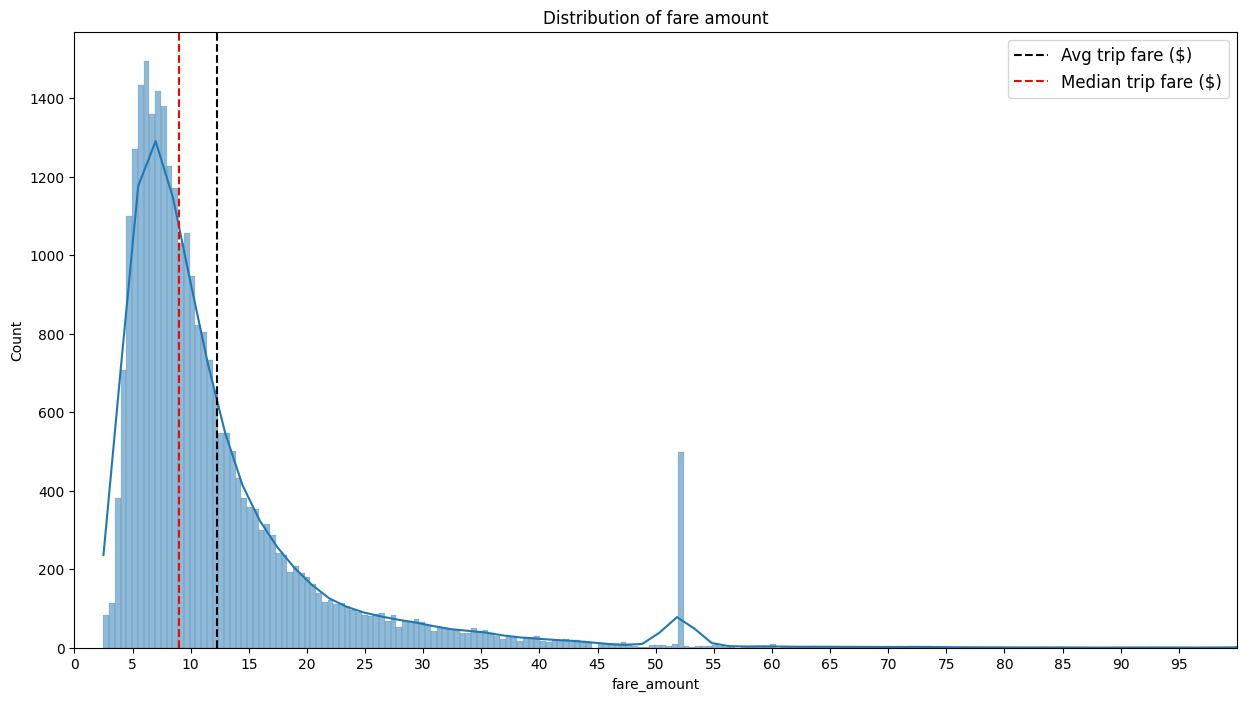

In [ ]:
sns.histplot(data=train,x="fare_amount",kde=True)

plt.axvline(train["fare_amount"].mean(),color = "k",
            linestyle = "dashed",label = "Avg trip fare ($)")
plt.axvline(train["fare_amount"].median(),color = "r",
            linestyle = "dashed",label = "Median trip fare ($)")

plt.title("Distribution of fare amount")
plt.xticks(np.arange(0, 100, step=5))
plt.legend(loc = "best",prop = {"size" : 12})
plt.gcf().set_size_inches(15,8)
plt.xlim(0,100)

<font size=4> Observations <font>
- We can observe a right skewed distribution and determine that most of the taxi fares range from **2.50\\$  to 20\\$**.
- This distribution also resembles the power law distribution, which is very common in real world.
- We can observe some peaks between **50\\$-55\\$**, which again are only few cases, hence they might affect the ML models learning. Therefore we can consider them as outliers and discard them, as they are only few in number.


### Step 2: Plotting distribution of Distance travelled (Haversine)

(0.0, 30.0)

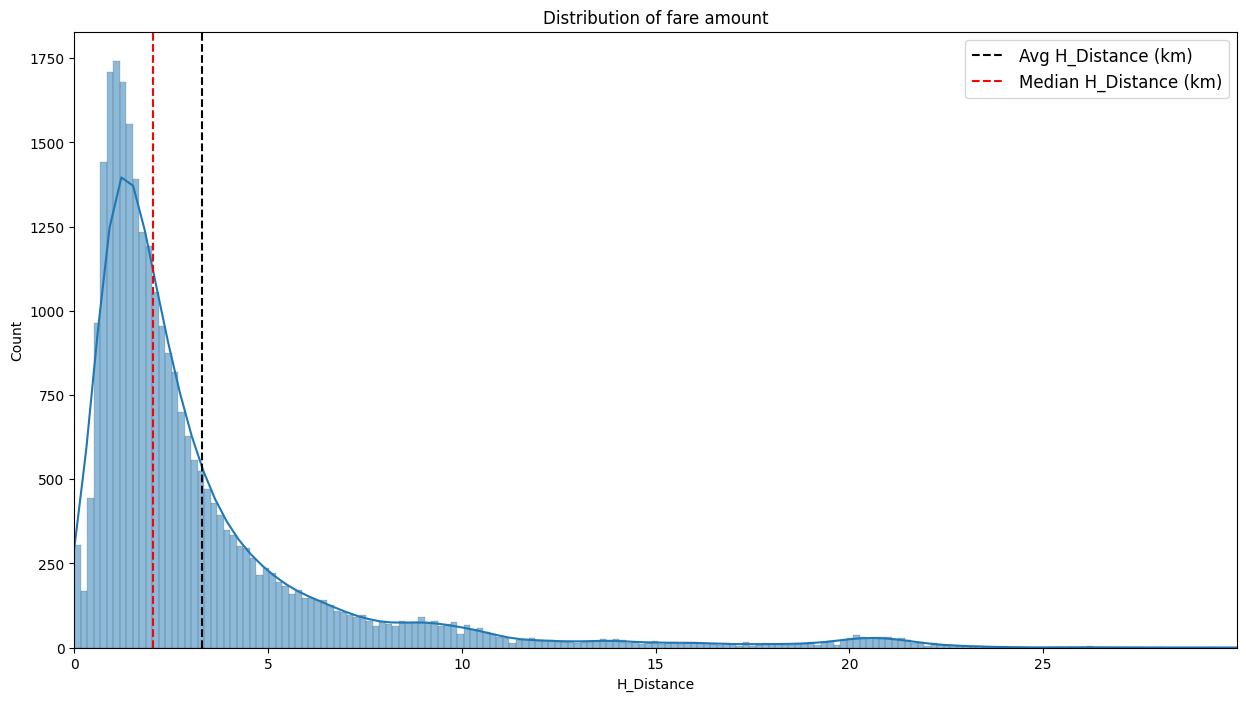

In [ ]:
sns.histplot(data=train,x="H_Distance",kde=True)

plt.axvline(train["H_Distance"].mean(),color = "k",
            linestyle = "dashed",label = "Avg H_Distance (km)")
plt.axvline(train["H_Distance"].median(),color = "r",
            linestyle = "dashed",label = "Median H_Distance (km)")

plt.title("Distribution of fare amount")
plt.xticks(np.arange(0, 30, step=5))
plt.legend(loc = "best",prop = {"size" : 12})
plt.gcf().set_size_inches(15,8)
plt.xlim(0,30)

<font size=4> Observations <font>
- We can observe that most of the passengers travel on average **3-5 km**.
- This distribution looks very similar to the distribution of the fare amount. Hence we can assume that both fare amount and distance have overlapping distributions.

### Step 3: Frequency of Passenger in rides

Text(0, 0.5, 'Frequency')

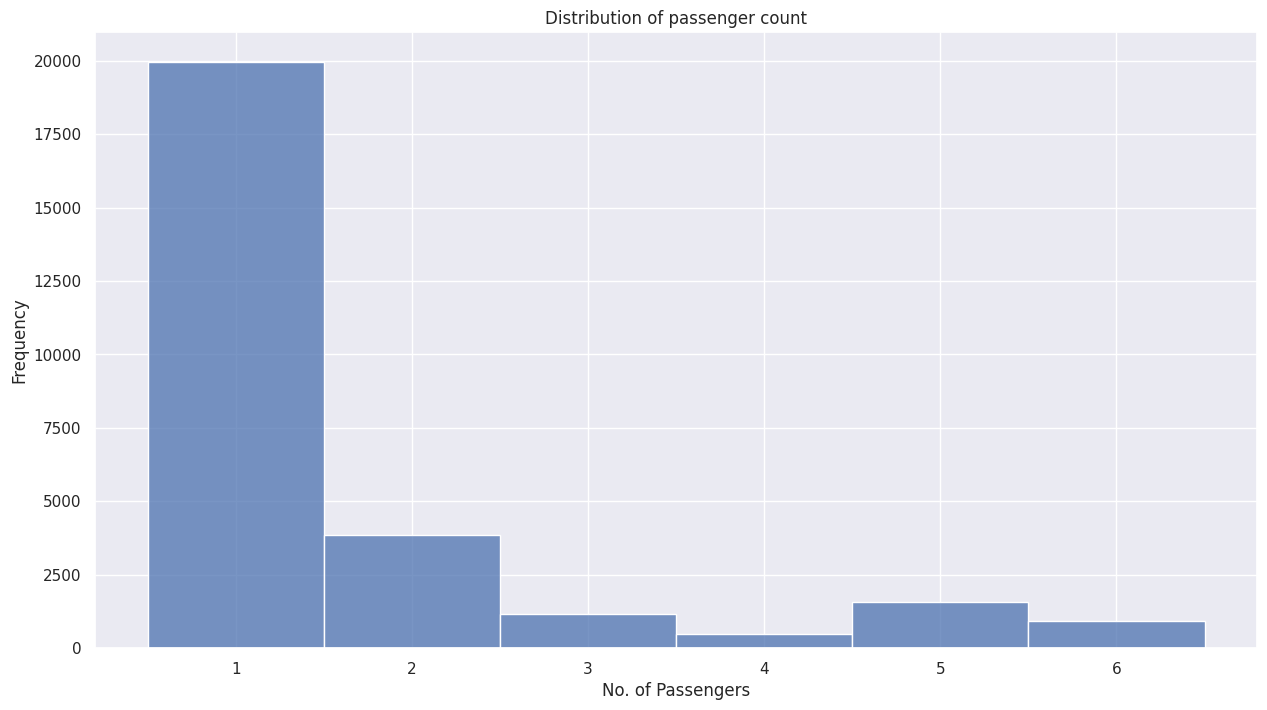

In [ ]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.histplot(data=train, x="passenger_count", stat="count", discrete=True)
plt.title("Distribution of passenger count")
plt.xlabel('No. of Passengers')
plt.ylabel('Frequency')

- The number of rides with only **1** passenger is the highest compared to more than 1 passenger rides.

### Step 4: Fare vs. Passenger Count

Text(0, 0.5, 'Fare')

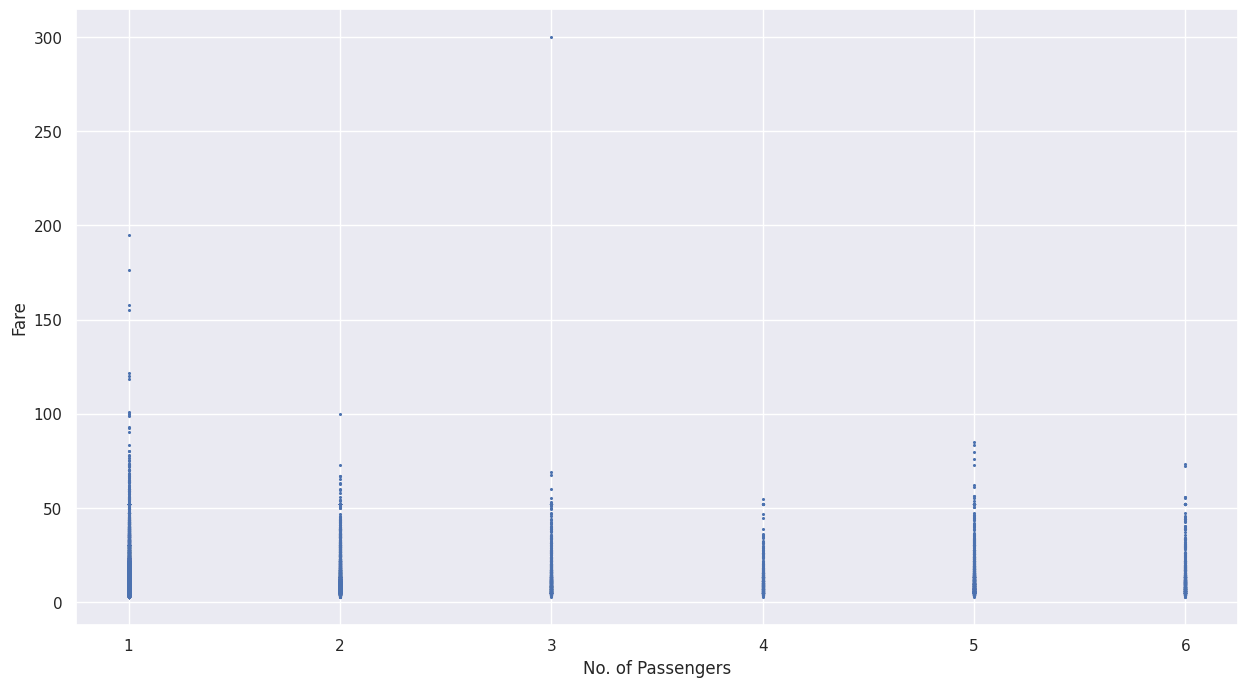

In [ ]:
plt.figure(figsize=(15,8))
plt.scatter(x=train['passenger_count'], y=train['fare_amount'], s=1.5)
plt.xlabel('No. of Passengers')
plt.ylabel('Fare')

- The fare in 1 passenger rides is higher compared to more than 1 passenger ride. This occurs due to the share of total fare amount.

### Step 5: Number of Rides vs. Hour of day

Text(0, 0.5, 'Frequency')

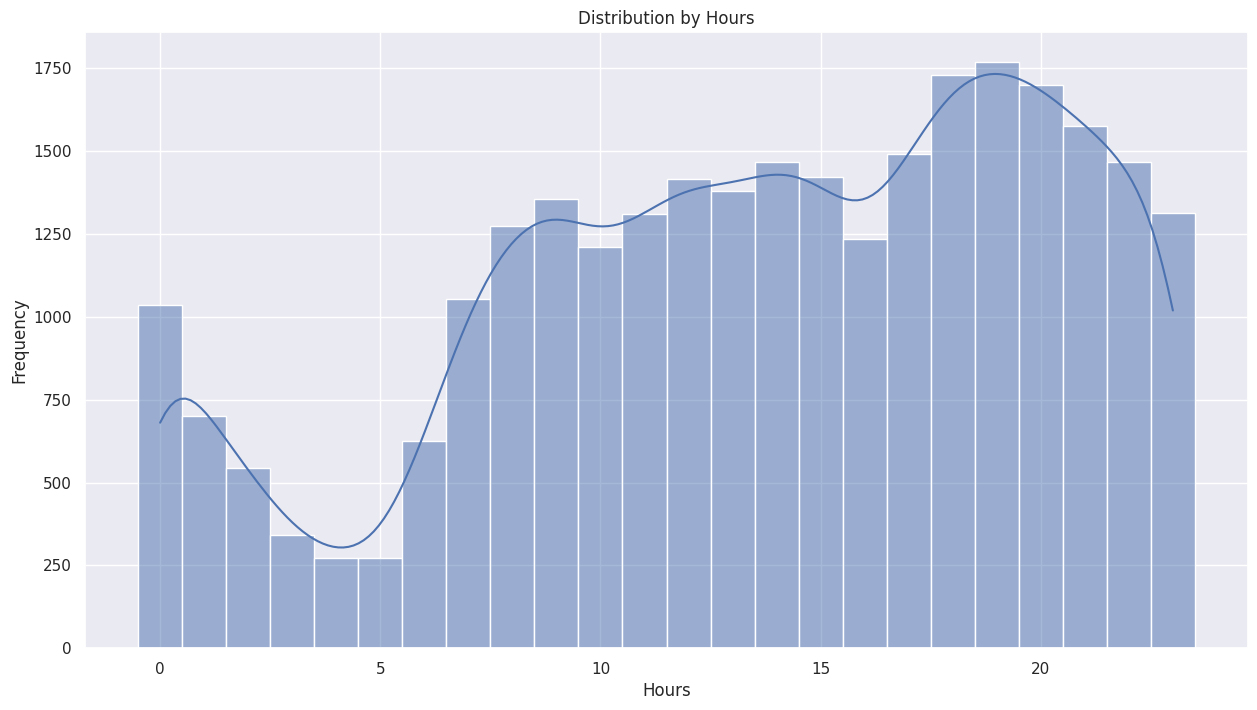

In [ ]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.histplot(data=train, x="hour", stat="count", discrete=True, kde=True)
plt.title("Distribution by Hours")
plt.xlabel('Hours')
plt.ylabel('Frequency')

* #### Taxi fares are rare at 5am and reaches the maximum at 7pm
- The number of rides at **5 am** in the morning are the least. The number of rides remains constant for the remaining hours of the day. This signifies the rush hour timings when people are going to and returning from work.

### Step 6: Fare vs. Hour of day

Text(0, 0.5, 'Fare')

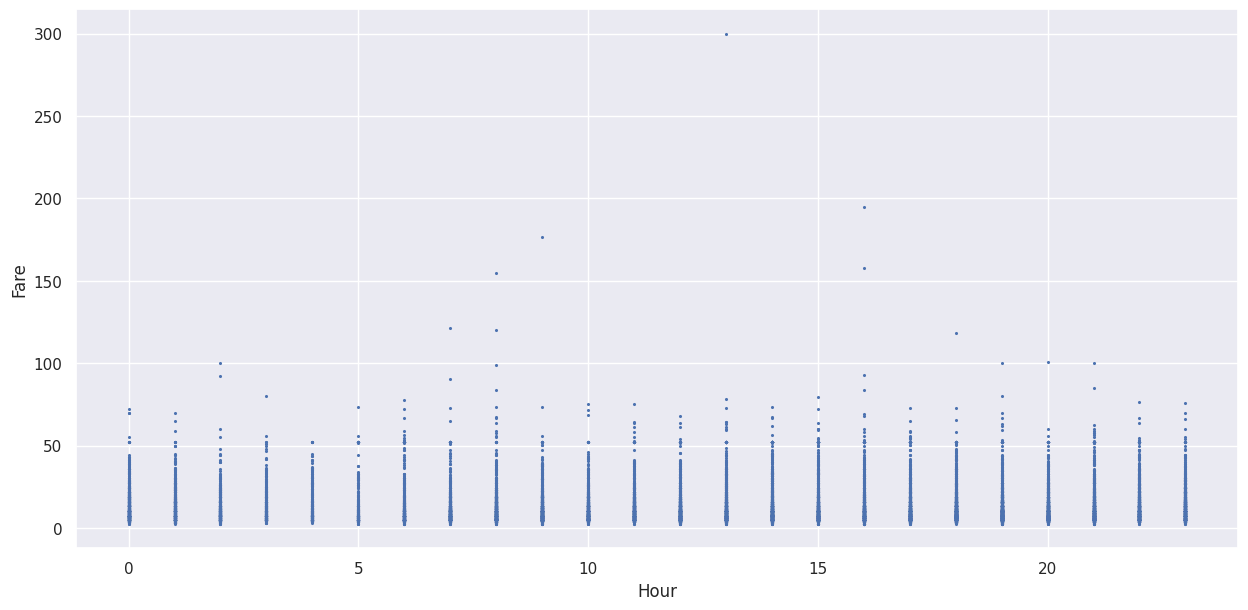

In [ ]:
plt.figure(figsize=(15,7))
plt.scatter(x=train['hour'], y=train['fare_amount'], s=1.5)
plt.xlabel('Hour')
plt.ylabel('Fare')

- We can observe that the fare amount for different hours of the day remains uniform, hence we don’t fetch any meaningful insight.

Text(0, 0.5, 'Fare')

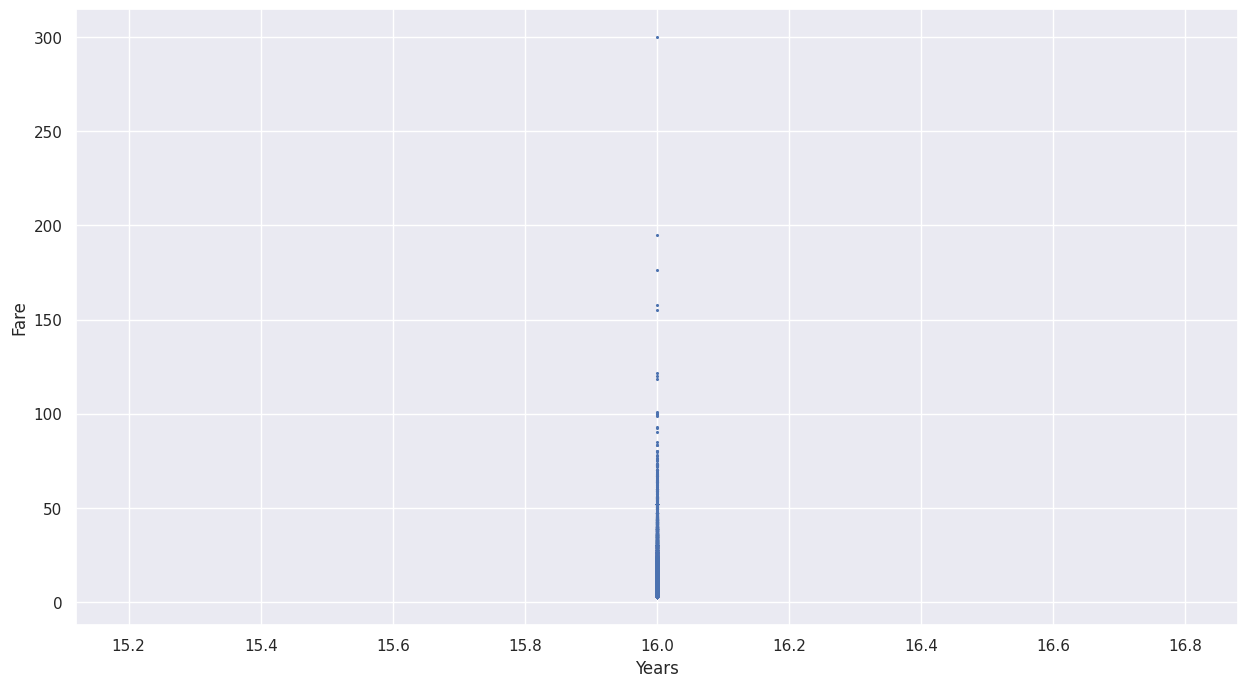

In [ ]:
plt.figure(figsize=(15,8))
plt.scatter(x=train['year'], y=train['fare_amount'], s=1.5)
plt.xlabel('Years')
plt.ylabel('Fare')

- The rate does not change significantly over the years

Text(0, 0.5, 'Fare')

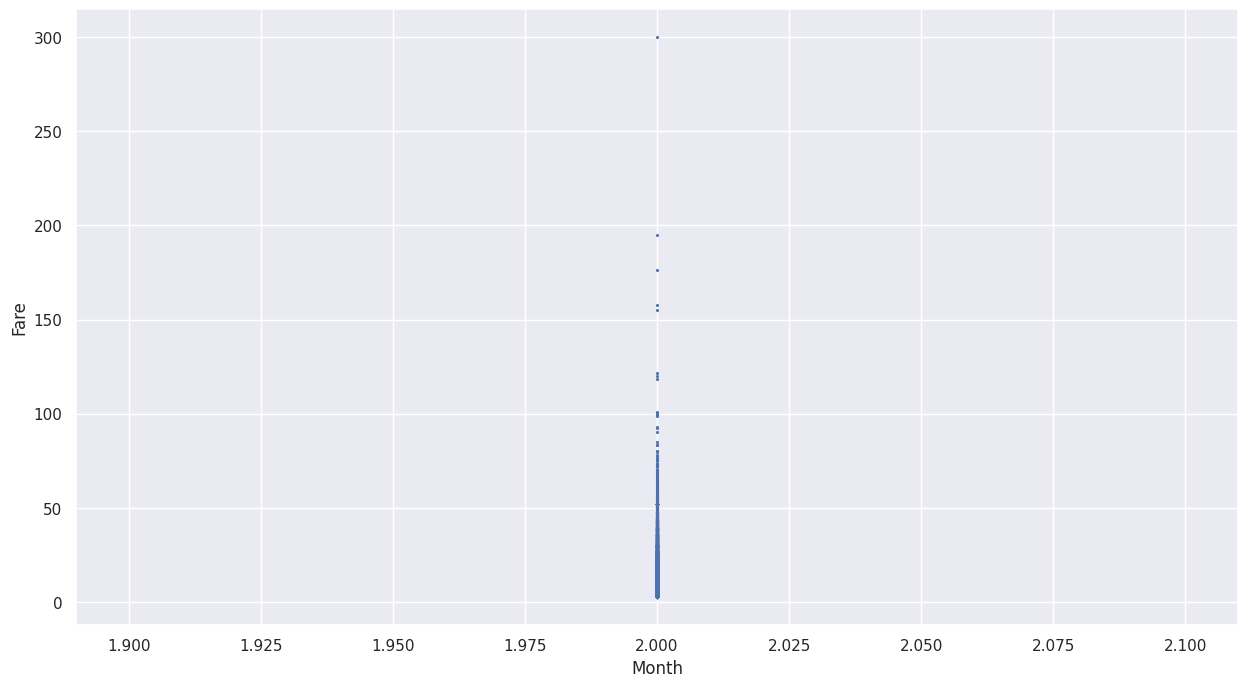

In [ ]:
plt.figure(figsize=(15,8))
plt.scatter(x=train['month'], y=train['fare_amount'], s=1.5)
plt.xlabel('Month')
plt.ylabel('Fare')

- The rate is uniform throughout the months

### Step 7: Fare vs. Day, Week and Month

In [ ]:
def time_slicer(df, timeframes, value, color="purple"):
    """
    Function to count observation occurrence through different lenses of time.
    """
    f, ax = plt.subplots(len(timeframes), figsize = [12,12])
    for i,x in enumerate(timeframes):
        df.loc[:,[x,value]].groupby([x]).mean().plot(ax=ax[i],color=color)
        ax[i].set_ylabel(value.replace("_", " ").title())
        ax[i].set_title("{} by {}".format(value.replace("_", " ").title(), x.replace("_", " ").title()))
        ax[i].set_xlabel("")
    plt.tight_layout(pad=0)

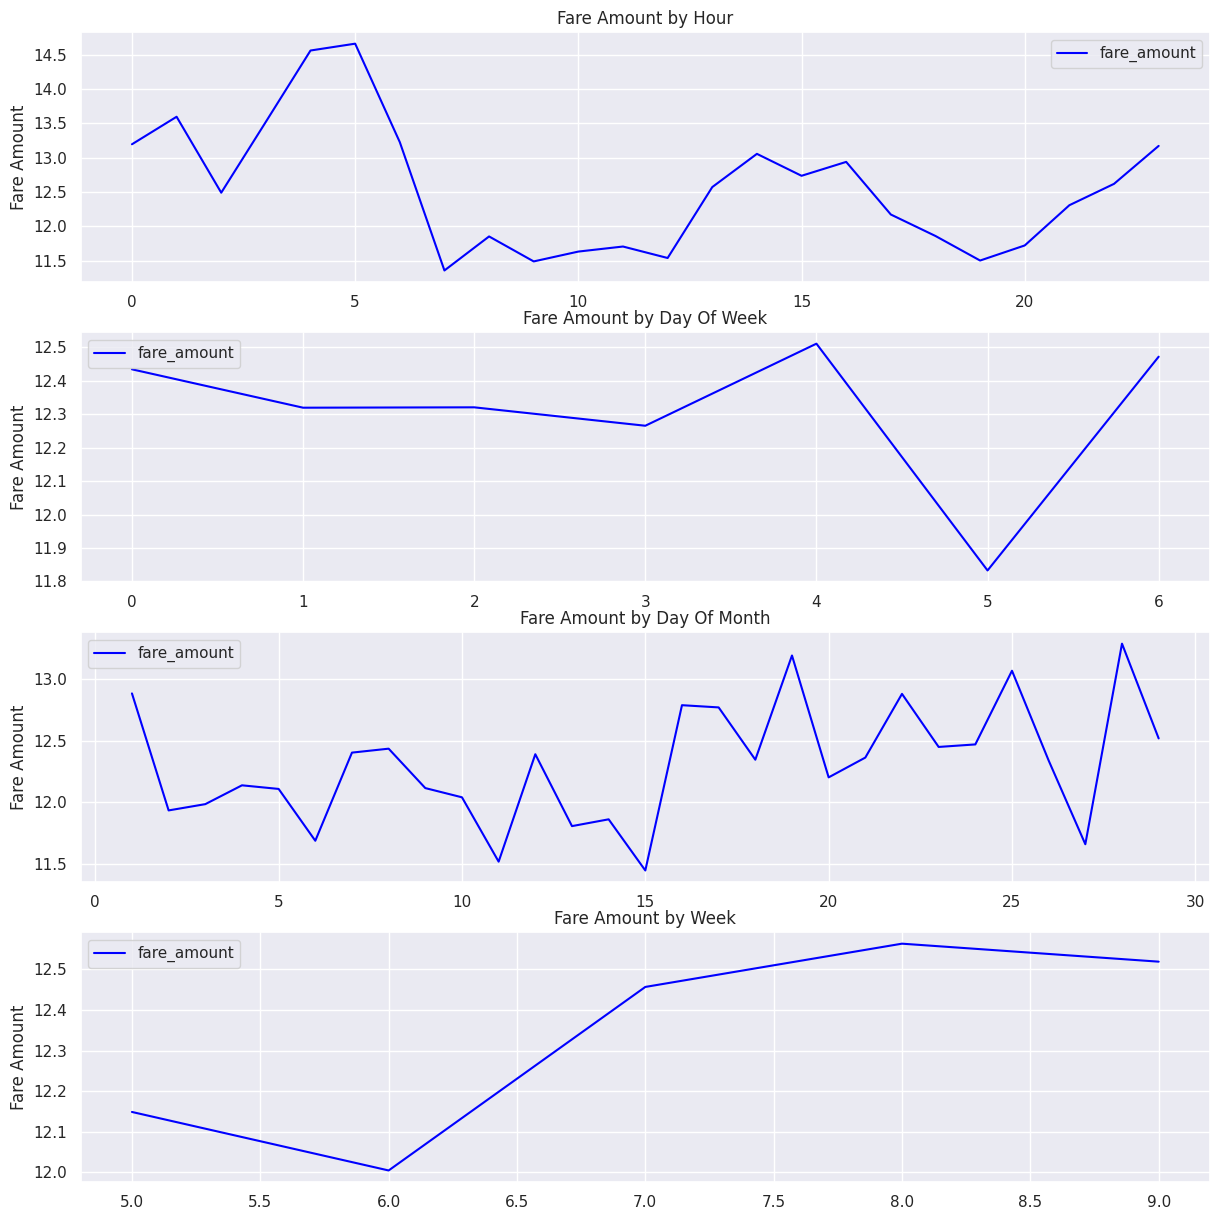

In [ ]:
time_slicer(df=train, timeframes=['hour', 'day_of_week','day_of_month', 'week', ], value = "fare_amount", color="blue")

- We can observe that average fare peaks at **Monday(6), Thursday(2), Friday(3)**
- We can also observe that the fare amount is the highest between the `3rd` and `4th` week of the month.

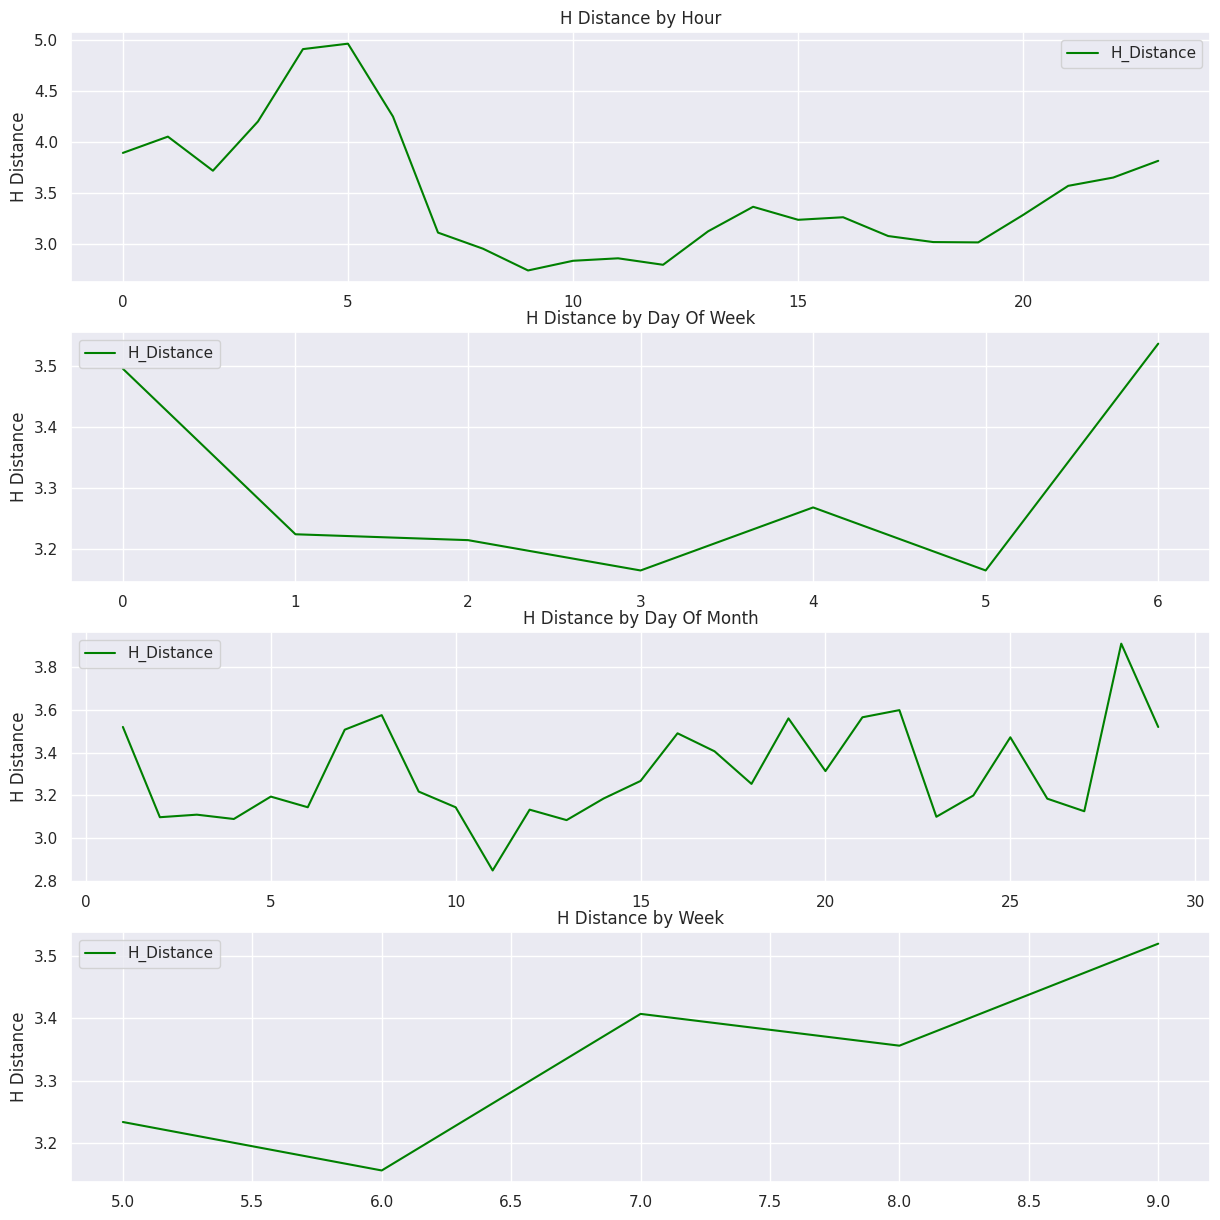

In [ ]:
time_slicer(df=train, timeframes=['hour', 'day_of_week','day_of_month', 'week'], value = "H_Distance", color="green")


In [ ]:
train[['fare_amount','H_Distance']].corr()

,fare_amount,H_Distance
fare_amount,1.000000,0.907706
H_Distance,0.907706,1.000000


* #### The correlation number between these two values is high, as a result the graphs are very similar to each other
* #### At 5 o'clock in the morning, some people who have a long distance to travel leave home early, but they are not many, so the fare increases.

### Step 8: Correlation Matrix  (Pearson’s Correlation)

We will now see the pairwise correlation between the numerical variables. Since the correlation matrix will be symmetric, we will only visualize the lower triangular matrix.

In [ ]:
# select numerical columns
numerical_cols = train.select_dtypes(include=['float', "int"]).columns
# compute the pairwise correlations
df_corr = train[numerical_cols].corr().round(2)

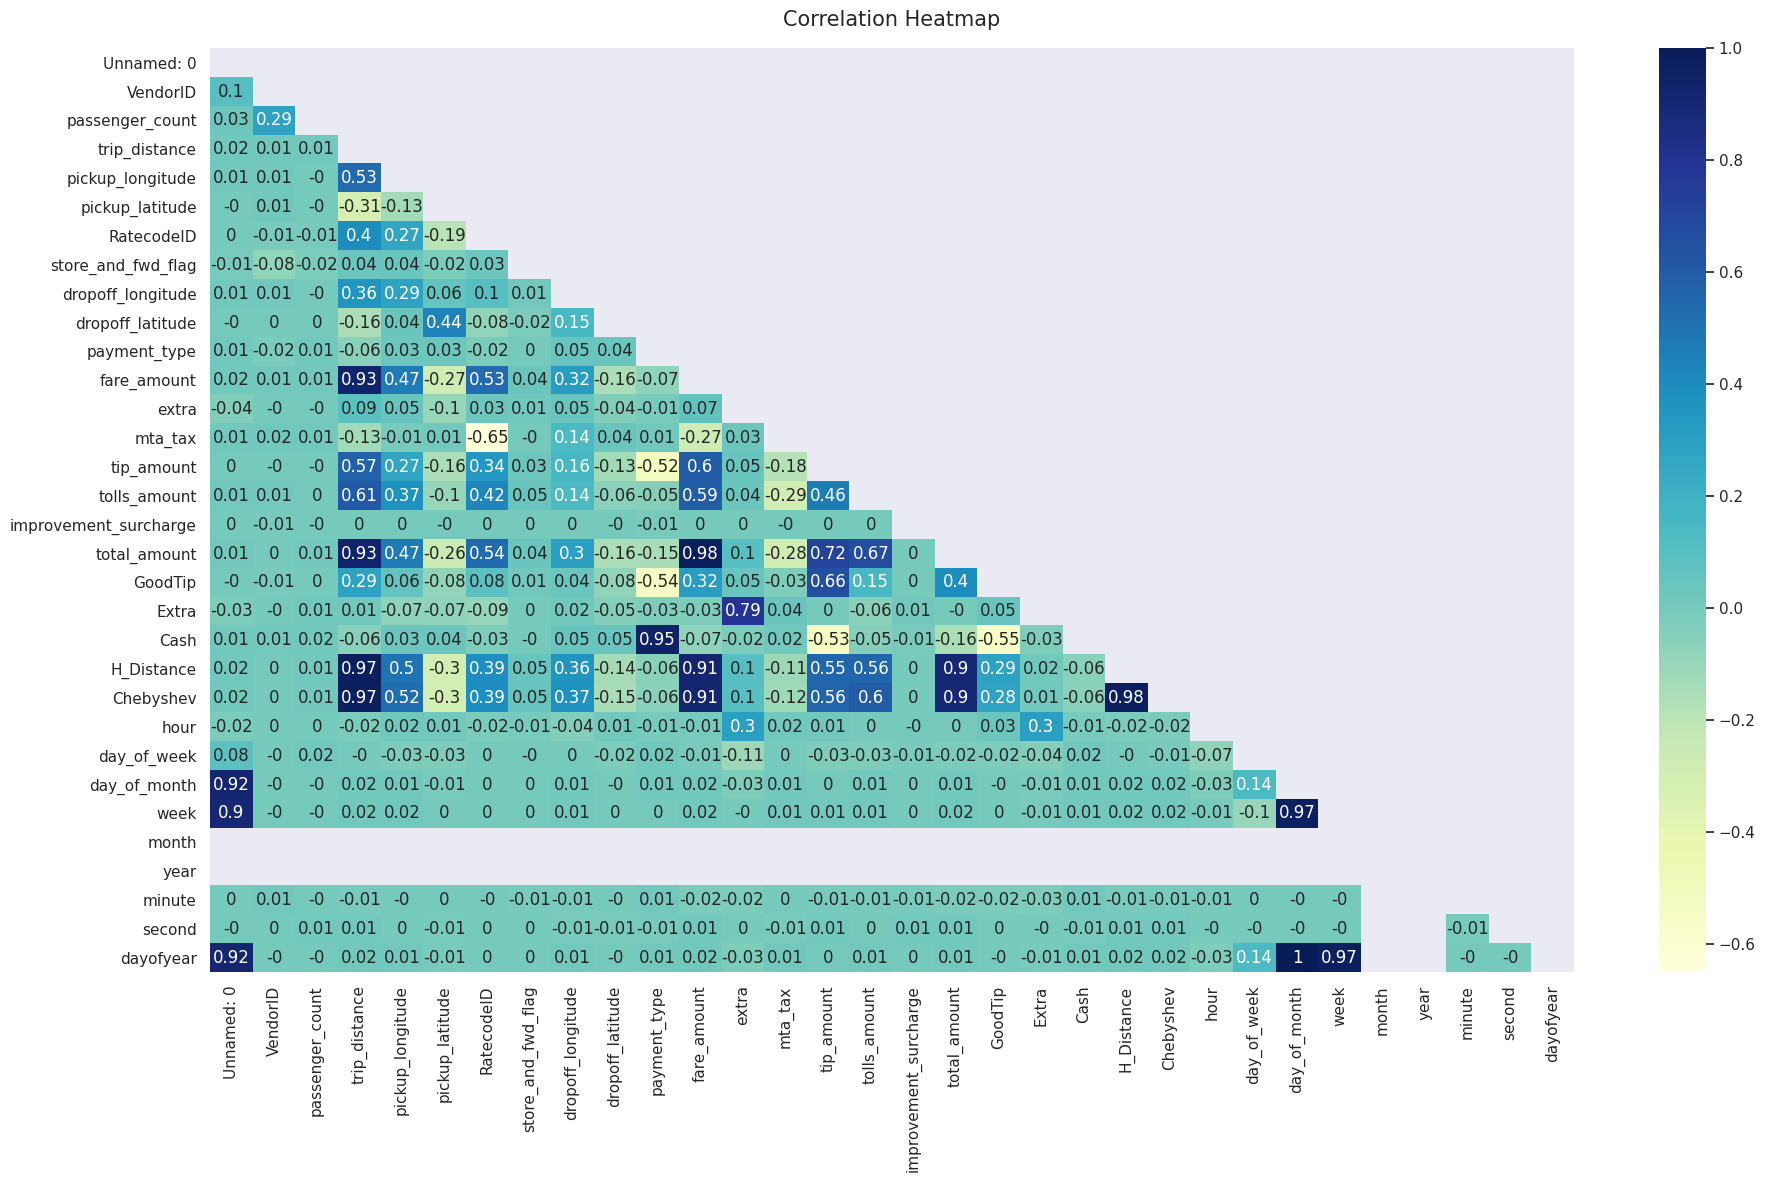

In [ ]:
mask = np.triu(np.ones_like(df_corr, dtype=bool))
#Correlation using heatmap
plt.figure(figsize = (22, 12))
heatmap = sns.heatmap(df_corr, mask=mask, annot=True, cmap="YlGnBu")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':15}, pad=16);
plt.show()

This is the correlation matrix with the range from +1 to -1 where +1 is highly and positively correlated and -1 will be highly negatively correlated.
- We can observe that our target variable **fare_amount** has high positive correlation with features like **Rate_Code_ID, Tip_amount, Toll_amount, total_amount**
- We can also observe high negative correlation with **mta_tax*
- We can also, conclude that the feature `fare_amount` and `total_amount` are almost the same as they have very high Person’s Correlation. We can remove similar redundant features from the dataset, as they will add to the

### Step 9: Bivariate analysis - Fare vs Distance (Haversine)

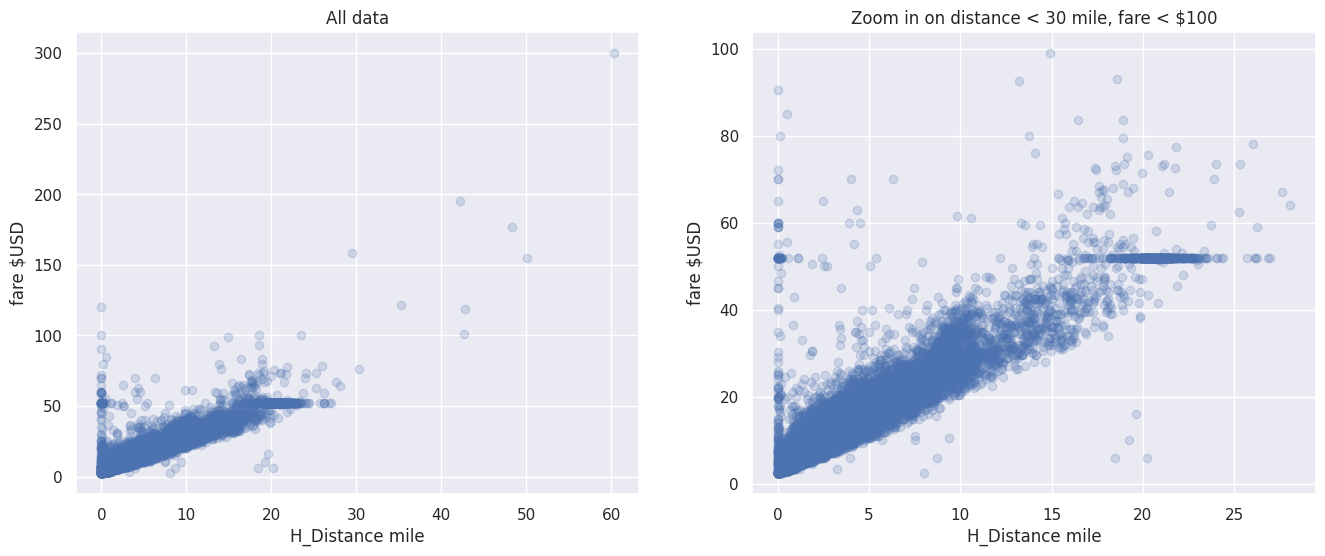

In [ ]:
# scatter plot distance - fare
fig, axs = plt.subplots(1, 2, figsize=(16,6))
axs[0].scatter(train.H_Distance, train.fare_amount, alpha=0.2)
axs[0].set_xlabel('H_Distance mile')
axs[0].set_ylabel('fare $USD')
axs[0].set_title('All data')

# zoom in on part of data
idx = (train.H_Distance < 30) & (train.fare_amount < 100)
axs[1].scatter(train[idx].H_Distance, train[idx].fare_amount, alpha=0.2)
axs[1].set_xlabel('H_Distance mile')
axs[1].set_ylabel('fare $USD')
axs[1].set_title('Zoom in on distance < 30 mile, fare < $100');

- We can observe a linear relationship between the fare amount and the total distance travelled. The distance feature is going to be very helpful for ML models like Linear Regression as we can clearly visualize the line which can intersect all the points when these two dimensions are chosen.

### Step 10: Plotting the pickup and drop off locations on Map

In [ ]:
import folium


long_trips=train[train['H_Distance']>=10]

drop_map = folium.Map(location = [40.730610,-73.935242],zoom_start = 12)

### For each pickup point add a circlemarker

for index, row in long_trips.iterrows():

    folium.CircleMarker([row['dropoff_latitude'], row['dropoff_longitude']],
                        radius=3,
                        color="green",
                        fill_opacity=0.9
                       ).add_to(drop_map)
for index, row in long_trips.iterrows():

    folium.CircleMarker([row['pickup_latitude'], row['pickup_longitude']],
                        radius=3,
                        color="blue",
                        fill_opacity=0.9
                       ).add_to(drop_map)
drop_map

- We can observe that, the `drop-off` and `pickup` locations are condensed near the city year- Manhattan. This intuitively makes sense as all the offices are located near the city, hence there is a heavy demand of ride hailing services in that area
- Also, the drop off locations are in the outskirts of the city, as it is the residential area, where people live.
- This information can be used to direct the drivers to the high demand area, which would fetch them more rides without a lot of waiting time. As the demand is high, the fare price increases to match the demand, and this will continue until the demand normalizes.

In [ ]:
print(train.dtypes)

Unnamed: 0                        int64
VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                   int64
trip_distance                   float64
pickup_longitude                float64
pickup_latitude                 float64
RatecodeID                        int64
store_and_fwd_flag                int64
dropoff_longitude               float64
dropoff_latitude                float64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
GoodTip                           int64
Extra                             int64
Cash                              int64
loc1                             object
loc2                             object


## Modeling

### Step 1: Train-Test Split
- We are splitting the data into two parts – Train and Test
- The split ratio is **75% train data** and **15 % test data**. This is because the dataset is inherently showing the behavior of being clean. Therefore, we can test the ML models on a smaller sample size. This splits ratio also gives us the opportunity to deal with larger cross-validation data.

In [ ]:
X = train.iloc[:,train.columns != "fare_amount"]
y = train["fare_amount"]
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.80, test_size=0.20, random_state=42, shuffle=True)

### Model 1: Linear Regression – Baseline Model

In [ ]:
def Linear_reg(X_train, X_valid, y_train, y_valid):
    linear = LinearRegression()
    linear.fit(X_train, y_train)

    y_train_predict = linear.predict(X_train)
    r2_train = r2_score(y_train, y_train_predict)
    RMSE_train = mean_squared_error(y_train, y_train_predict, squared=False)

    y_valid_predict = linear.predict(X_valid)
    r2_valid = r2_score(y_valid, y_valid_predict)
    RMSE_valid = mean_squared_error(y_valid, y_valid_predict, squared=False)

    return r2_train, r2_valid, linear,RMSE_train,RMSE_valid

r2_train, r2_valid, linear,RMSE_train,RMSE_valid = Linear_reg(X_train, X_valid, y_train, y_valid)

print("R^2 (train) : ", r2_train)
print("RMSE (train): ", RMSE_train)
print("R^2 (valid) : ", r2_valid)
print("RMSE (valid): ", RMSE_valid)

TypeError: float() argument must be a string or a number, not 'Timestamp'

- We can observe that the root mean square error for both train and validation datasets is extremely low, hence we can consider them to be 0.
- Also, there isn’t a significant difference deviation between the RMSE of train and validation dataset, therefore we conclude there isn’t an overfitting problem.


### Model 2: Decision Tree Regressor(Tree based Model)

In [ ]:
dtr = DecisionTreeRegressor().fit(X_train, y_train)
y_valid_pred = dtr.predict(X_valid)



#Root Mean Square Error
rmse = np.sqrt(mean_squared_error(y_valid, y_valid_pred))
print("RMSE: %f" % (rmse))

# Mean Squared Error
print("Mean squared error: %.2f"
% mean_squared_error(y_valid, y_valid_pred))

#  R2 Score
print('Variance score: %.2f' % r2_score(y_valid, y_valid_pred))

TypeError: float() argument must be a string or a number, not 'Timestamp'

- We can observe that the root mean square error for decision tree model is 1.0566, which is more than the RMSE of Linear Regression.

### Model 3: Extra Gradient Boosting Tree (Boosting Model)

In [ ]:
params = {

    'max_depth': 7,
    'gamma' :0,
    'eta':.03,
    'subsample': 1,
    'colsample_bytree': 0.9,
    'objective':'reg:linear',
    'eval_metric':'rmse',
    'silent': 0,
    'verbosity' : 0,
    'random_state' : 42
}

In [ ]:
def XGBmodel(X_train,X_valid,y_train,y_valid,params):
    matrix_train = xgb.DMatrix(X_train,label=y_train)
    matrix_valid = xgb.DMatrix(X_valid,label=y_valid)
    model=xgb.train(params=params,
                    dtrain=matrix_train,num_boost_round=500,
                    early_stopping_rounds=10,evals=[(matrix_valid,'valid')])
    return model

model = XGBmodel(X_train,X_valid,y_train,y_valid,params)

ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, The experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:tpep_pickup_datetime: datetime64[ns], tpep_dropoff_datetime: datetime64[ns], loc1: object, loc2: object

- We can observe that the final RMSE for XGboost model is 0.630 at the 500th iteration. This model is significantly performing better than Decision Tree but not as good as Linear Regression.

### Feature Importance - XGBoost

In [ ]:
y = model.predict(xgb.DMatrix(X_valid), ntree_limit = model.best_ntree_limit).tolist()

In [ ]:
fscores = pd.DataFrame({'X': list(model.get_fscore().keys()), 'Y': list(model.get_fscore().values())})
fscores.sort_values(by='Y').plot.bar(x='X')

- We can observe that XGBoost is finding features like tip amount, trip distance more useful to find the target variable.

### Feature Importance – Linear Regression

In [ ]:
print(list(zip( linear.coef_, X.columns)))

- We can observe that linear regression is assigning high negative coefficients to features like trip distance, tip amount, payment type, cash.

## Model Evaluation

#### Model Evaluation 1: Linear Regression

#### Model Evaluation 2: Decision Tree

#### Model Evaluation 3: XGBoost

### Model Performance Comparison

| **Model Name**         | **RMSE**         | **R ^2**          | **MAPE**                                                                                                                                                                                        
| --------------------- | ------------------| ------------------| ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|Linear Regression      | 4.38e -07         | 1                 | 7.19e -16                                                                                          
| Decision Tree         | 1.0566            | 0.97              | 0.0993                                                                                                                      
| XGBoost               |  0.630            | 0.97	            | 0.0560                                                                                                                 

# References <a id ="references"></a>

1. TLC Trip Record Data, https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page, accessed on 26.01.2023
2. Latitude and longitude coordinates of Newyork City, https://www.latlong.net/place/new-york-city-ny-usa-1848.html, accessed on 26.01.2023
2. Simon Brugman. 2019. pandas-profiling: Exploratory Data Analysis for Python. https://github.com/pandas- profiling/pandas- profiling.
3. Allen M, Poggiali D, Whitaker K, Marshall TR, Kievit RA. 2019, Raincloud plots: a multi-platform tool for robust data visualization.
4. Arthur Chi'en, What are all those taxi and for-hire ride surcharges?, https://www.fox5ny.com/news/nyc-taxi-uber-lyft-fhv-surcharges-fees, accessed on 09.12.2022
5. Shubham, Decision Tree Tutorial, https://www.hackerearth.com/practice/machine-learning/machine-learning-algorithms/ml-decision-tree/tutorial/, accessed on 09.12.2022
6. Manav, Decision Trees: Explained in Simple Steps, https://medium.com/analytics-vidhya/decision-trees-explained-in-simple-steps-39ee1a6b00a2, accessed on 09.12.2022
7. Tree algorithms: ID3, C4.5, C5.0 and CART, https://scikit-learn.org/stable/modules/tree.html#tree-algorithms-id3-c4-5-c5-0-and-cart, accessed on 09.12.2022
[1] https://www.latlong.net/place/new-york-city-ny-usa-1848.html